In [14]:
# First import some necessary libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Suppress all warnings
import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(precision = 3)
from IPython.core.display import HTML

%matplotlib inline

In [15]:
#load data file
data_df_2 = pd.read_csv('assets/triplicate_batch_images.csv', low_memory = False)
print(data_df_2.shape)
data_df_2.head()

(63236, 14)


,cell,drug,min_conc,max_conc,min_norm_intensity,max_norm_intensity,mean_sd,convergence,upper_limit,IC50,slope,lower_limit,file_path,image_name
0,8570,1034,0.007812,2.0,0.074097,0.664380,0.044709,True,0.901533,0.010218,-2.155016,0.152275,/Users/akfay/Documents/Capstone/triplicate_bat...,PC-14_1034_419_Glo_250_4_3.png
1,8570,1034,0.007812,2.0,0.087338,0.672330,0.040231,True,1.610422,0.005150,-1.883030,0.167002,/Users/akfay/Documents/Capstone/triplicate_bat...,PC-14_1034_419_Glo_250_4_6.png
2,8570,1034,0.007812,2.0,0.068806,0.717342,0.050703,True,14.883637,0.000010,-0.010746,-12.938230,/Users/akfay/Documents/Capstone/triplicate_bat...,PC-14_1034_419_Glo_250_4_9.png
3,8570,1034,0.007812,2.0,0.071687,0.569093,0.038261,True,0.744103,0.011272,-1.882265,0.129222,/Users/akfay/Documents/Capstone/triplicate_bat...,PC-14_1034_419_Glo_250_4_12.png
4,8570,1034,0.007812,2.0,0.058225,0.714683,0.055069,True,0.654130,0.026046,-6.163449,0.129686,/Users/akfay/Documents/Capstone/triplicate_bat...,PC-14_1034_419_Glo_250_4_15.png


In [16]:
#load cluster images dataset

clusters_df = pd.read_csv('assets/vgg19_clusters (1).csv', low_memory = False)
clusters_df = clusters_df.rename(columns={"image": "image_name"})

print(clusters_df.shape)
clusters_df.head()


(62159, 2)


,image_name,cluster
0,KP-4_1088_490_Glo_400_4_24.png,35
1,NCI-H650_1034_517_Glo_400_4_3.png,35
2,SK-MEL-2_1266_714_b_17_a_1600_3_0.png,35
3,SK-MEL-2_1266_714_f_17_a_1600_3_0.png,35
4,SUIT-2_1034_495_Glo_325_4_9.png,35


In [17]:
#merge two dataframe on image_name

triplicate_batch_images_clusters_df = pd.merge(data_df_2, clusters_df, on='image_name', how='outer')
print(triplicate_batch_images_clusters_df.shape)
triplicate_batch_images_clusters_df.tail()

(63236, 15)


,cell,drug,min_conc,max_conc,min_norm_intensity,max_norm_intensity,mean_sd,convergence,upper_limit,IC50,slope,lower_limit,file_path,image_name,cluster
63231,6412,1192,0.009766,10.0,0.307581,1.335618,0.078498,True,1.165328,6.381202,-1.442833,-0.115036,/Users/akfay/Documents/Capstone/triplicate_bat...,HCC2218_1192_347_Glo_2000_4_3.png,38
63232,6413,1192,0.009766,10.0,0.671477,1.099878,0.064007,True,1.042716,22.063667,-0.497382,0.277841,/Users/akfay/Documents/Capstone/triplicate_bat...,AU565_1192_347_Glo_500_4_3.png,37
63233,6290,1192,0.009766,10.0,0.640827,1.023175,0.069889,True,0.911329,0.957016,-9.194456,0.793217,/Users/akfay/Documents/Capstone/triplicate_bat...,HCC1187_1192_347_Glo_3000_4_3.png,1
63234,6310,1192,0.009766,10.0,0.572646,1.129622,0.119326,True,0.928182,1782.928576,-0.634245,-6.424923,/Users/akfay/Documents/Capstone/triplicate_bat...,MDA-MB-231_1192_347_Glo_100_4_3.png,6
63235,6411,1192,0.009766,10.0,0.816443,1.157349,0.063773,True,4.173590,0.005404,-5.491619,0.970245,/Users/akfay/Documents/Capstone/triplicate_bat...,MDA-MB-436_1192_347_Glo_400_4_3.png,1


In [18]:
labels_df = pd.read_csv('assets/Image_VGG19_labels.csv', low_memory = False)
labels_df = labels_df.rename(columns={"Cluster": "cluster", "VGG19 Label":"VGG19_Label"})
labels_df = labels_df.reset_index(drop=True)
print(labels_df.shape)
labels_df.head()

(40, 2)


,cluster,VGG19_Label
0,0,Good
1,1,No Response
2,2,Good
3,3,Mediocre
4,4,bad


In [19]:
#convert to dict

mydict = dict(zip(labels_df.cluster, labels_df.VGG19_Label))
labeles_df = labels_df.to_dict()
labeles_df

{'cluster': {0: 0,
  1: 1,
  2: 2,
  3: 3,
  4: 4,
  5: 5,
  6: 6,
  7: 7,
  8: 8,
  9: 9,
  10: 10,
  11: 11,
  12: 12,
  13: 13,
  14: 14,
  15: 15,
  16: 16,
  17: 17,
  18: 18,
  19: 19,
  20: 20,
  21: 21,
  22: 22,
  23: 23,
  24: 24,
  25: 25,
  26: 26,
  27: 27,
  28: 28,
  29: 29,
  30: 30,
  31: 31,
  32: 32,
  33: 33,
  34: 34,
  35: 35,
  36: 36,
  37: 37,
  38: 38,
  39: 39},
 'VGG19_Label': {0: 'Good',
  1: 'No Response',
  2: 'Good',
  3: 'Mediocre',
  4: 'bad',
  5: 'Mediocre',
  6: 'Mediocre',
  7: 'good',
  8: 'Mediocre',
  9: 'Mediocre',
  10: 'Mediocre',
  11: 'Good',
  12: 'Mediocre',
  13: 'No Response',
  14: 'Mediocre',
  15: 'No Response',
  16: 'Good',
  17: 'Good',
  18: 'No Response',
  19: 'Mediocre',
  20: 'Mediocre',
  21: 'Bad',
  22: 'Bad',
  23: 'No Response',
  24: 'Mediocre',
  25: 'Good',
  26: 'Bad',
  27: 'Bad',
  28: 'No Response',
  29: 'Bad',
  30: 'Good',
  31: 'Mediocre',
  32: 'No Response',
  33: 'Mediocre',
  34: 'Mediocre',
  35: 'Bad',
 

In [20]:
#prepare dict for mapping 

VGG19_Label ={0: 'Good',
  1: 'No Response',
  2: 'Good',
  3: 'Mediocre',
  4: 'bad',
  5: 'Mediocre',
  6: 'Mediocre',
  7: 'good',
  8: 'Mediocre',
  9: 'Mediocre',
  10: 'Mediocre',
  11: 'Good',
  12: 'Mediocre',
  13: 'No Response',
  14: 'Mediocre',
  15: 'No Response',
  16: 'Good',
  17: 'Good',
  18: 'No Response',
  19: 'Mediocre',
  20: 'Mediocre',
  21: 'Bad',
  22: 'Bad',
  23: 'No Response',
  24: 'Mediocre',
  25: 'Good',
  26: 'Bad',
  27: 'Bad',
  28: 'No Response',
  29: 'Bad',
  30: 'Good',
  31: 'Mediocre',
  32: 'No Response',
  33: 'Mediocre',
  34: 'Mediocre',
  35: 'Bad',
  36: 'Good',
  37: 'Mediocre',
  38: 'Mediocre',
  39: 'Mediocre'}

In [21]:
#map the cluster information from dict

triplicate_batch_images_clusters_df['label'] = triplicate_batch_images_clusters_df['cluster'].map(VGG19_Label)
triplicate_batch_images_clusters_df.head()

,cell,drug,min_conc,max_conc,min_norm_intensity,max_norm_intensity,mean_sd,convergence,upper_limit,IC50,slope,lower_limit,file_path,image_name,cluster,label
0,8570,1034,0.007812,2.0,0.074097,0.664380,0.044709,True,0.901533,0.010218,-2.155016,0.152275,/Users/akfay/Documents/Capstone/triplicate_bat...,PC-14_1034_419_Glo_250_4_3.png,12,Mediocre
1,8570,1034,0.007812,2.0,0.087338,0.672330,0.040231,True,1.610422,0.005150,-1.883030,0.167002,/Users/akfay/Documents/Capstone/triplicate_bat...,PC-14_1034_419_Glo_250_4_6.png,12,Mediocre
2,8570,1034,0.007812,2.0,0.068806,0.717342,0.050703,True,14.883637,0.000010,-0.010746,-12.938230,/Users/akfay/Documents/Capstone/triplicate_bat...,PC-14_1034_419_Glo_250_4_9.png,29,Bad
3,8570,1034,0.007812,2.0,0.071687,0.569093,0.038261,True,0.744103,0.011272,-1.882265,0.129222,/Users/akfay/Documents/Capstone/triplicate_bat...,PC-14_1034_419_Glo_250_4_12.png,12,Mediocre
4,8570,1034,0.007812,2.0,0.058225,0.714683,0.055069,True,0.654130,0.026046,-6.163449,0.129686,/Users/akfay/Documents/Capstone/triplicate_bat...,PC-14_1034_419_Glo_250_4_15.png,19,Mediocre


In [22]:
#check the shape of the data_frame

print(triplicate_batch_images_clusters_df.shape)
triplicate_batch_images_clusters_df.tail()

(63236, 16)


,cell,drug,min_conc,max_conc,min_norm_intensity,max_norm_intensity,mean_sd,convergence,upper_limit,IC50,slope,lower_limit,file_path,image_name,cluster,label
63231,6412,1192,0.009766,10.0,0.307581,1.335618,0.078498,True,1.165328,6.381202,-1.442833,-0.115036,/Users/akfay/Documents/Capstone/triplicate_bat...,HCC2218_1192_347_Glo_2000_4_3.png,38,Mediocre
63232,6413,1192,0.009766,10.0,0.671477,1.099878,0.064007,True,1.042716,22.063667,-0.497382,0.277841,/Users/akfay/Documents/Capstone/triplicate_bat...,AU565_1192_347_Glo_500_4_3.png,37,Mediocre
63233,6290,1192,0.009766,10.0,0.640827,1.023175,0.069889,True,0.911329,0.957016,-9.194456,0.793217,/Users/akfay/Documents/Capstone/triplicate_bat...,HCC1187_1192_347_Glo_3000_4_3.png,1,No Response
63234,6310,1192,0.009766,10.0,0.572646,1.129622,0.119326,True,0.928182,1782.928576,-0.634245,-6.424923,/Users/akfay/Documents/Capstone/triplicate_bat...,MDA-MB-231_1192_347_Glo_100_4_3.png,6,Mediocre
63235,6411,1192,0.009766,10.0,0.816443,1.157349,0.063773,True,4.173590,0.005404,-5.491619,0.970245,/Users/akfay/Documents/Capstone/triplicate_bat...,MDA-MB-436_1192_347_Glo_400_4_3.png,1,No Response


In [23]:
# save the dataframe to csv file

triplicate_batch_images_clusters_df.to_csv('triplicate_batch_images_labels_updated.csv')

In [24]:
triplicate_batch_images_clusters_df.dtypes

cell                    int64
drug                    int64
min_conc              float64
max_conc              float64
min_norm_intensity    float64
max_norm_intensity    float64
mean_sd               float64
convergence              bool
upper_limit           float64
IC50                  float64
slope                 float64
lower_limit           float64
file_path              object
image_name             object
cluster                 int64
label                  object
dtype: object

In [25]:
# drop duplicate image_names

triplicate_batch_images_clusters_df = triplicate_batch_images_clusters_df.drop_duplicates(subset=['image_name'])
triplicate_batch_images_clusters_df.head()

,cell,drug,min_conc,max_conc,min_norm_intensity,max_norm_intensity,mean_sd,convergence,upper_limit,IC50,slope,lower_limit,file_path,image_name,cluster,label
0,8570,1034,0.007812,2.0,0.074097,0.664380,0.044709,True,0.901533,0.010218,-2.155016,0.152275,/Users/akfay/Documents/Capstone/triplicate_bat...,PC-14_1034_419_Glo_250_4_3.png,12,Mediocre
1,8570,1034,0.007812,2.0,0.087338,0.672330,0.040231,True,1.610422,0.005150,-1.883030,0.167002,/Users/akfay/Documents/Capstone/triplicate_bat...,PC-14_1034_419_Glo_250_4_6.png,12,Mediocre
2,8570,1034,0.007812,2.0,0.068806,0.717342,0.050703,True,14.883637,0.000010,-0.010746,-12.938230,/Users/akfay/Documents/Capstone/triplicate_bat...,PC-14_1034_419_Glo_250_4_9.png,29,Bad
3,8570,1034,0.007812,2.0,0.071687,0.569093,0.038261,True,0.744103,0.011272,-1.882265,0.129222,/Users/akfay/Documents/Capstone/triplicate_bat...,PC-14_1034_419_Glo_250_4_12.png,12,Mediocre
4,8570,1034,0.007812,2.0,0.058225,0.714683,0.055069,True,0.654130,0.026046,-6.163449,0.129686,/Users/akfay/Documents/Capstone/triplicate_bat...,PC-14_1034_419_Glo_250_4_15.png,19,Mediocre


In [26]:
#copy the dataframe

df_cluster_label = triplicate_batch_images_clusters_df.copy()
df_cluster_label.head()

,cell,drug,min_conc,max_conc,min_norm_intensity,max_norm_intensity,mean_sd,convergence,upper_limit,IC50,slope,lower_limit,file_path,image_name,cluster,label
0,8570,1034,0.007812,2.0,0.074097,0.664380,0.044709,True,0.901533,0.010218,-2.155016,0.152275,/Users/akfay/Documents/Capstone/triplicate_bat...,PC-14_1034_419_Glo_250_4_3.png,12,Mediocre
1,8570,1034,0.007812,2.0,0.087338,0.672330,0.040231,True,1.610422,0.005150,-1.883030,0.167002,/Users/akfay/Documents/Capstone/triplicate_bat...,PC-14_1034_419_Glo_250_4_6.png,12,Mediocre
2,8570,1034,0.007812,2.0,0.068806,0.717342,0.050703,True,14.883637,0.000010,-0.010746,-12.938230,/Users/akfay/Documents/Capstone/triplicate_bat...,PC-14_1034_419_Glo_250_4_9.png,29,Bad
3,8570,1034,0.007812,2.0,0.071687,0.569093,0.038261,True,0.744103,0.011272,-1.882265,0.129222,/Users/akfay/Documents/Capstone/triplicate_bat...,PC-14_1034_419_Glo_250_4_12.png,12,Mediocre
4,8570,1034,0.007812,2.0,0.058225,0.714683,0.055069,True,0.654130,0.026046,-6.163449,0.129686,/Users/akfay/Documents/Capstone/triplicate_bat...,PC-14_1034_419_Glo_250_4_15.png,19,Mediocre


In [27]:
# keep the commented codes below for columns include or not

#df_cluster_label.drop(labels = ["cell","drug", "image_name", "file_path"], axis=1, inplace=True) #droping cell, drug
# cast variables as object to treat as categorical
df_cluster_label.drop(labels = ["image_name", "file_path"], axis=1, inplace=True) # not dropping cell, drug

In [28]:
#check the dataframe

df_cluster_label.head()

,cell,drug,min_conc,max_conc,min_norm_intensity,max_norm_intensity,mean_sd,convergence,upper_limit,IC50,slope,lower_limit,cluster,label
0,8570,1034,0.007812,2.0,0.074097,0.664380,0.044709,True,0.901533,0.010218,-2.155016,0.152275,12,Mediocre
1,8570,1034,0.007812,2.0,0.087338,0.672330,0.040231,True,1.610422,0.005150,-1.883030,0.167002,12,Mediocre
2,8570,1034,0.007812,2.0,0.068806,0.717342,0.050703,True,14.883637,0.000010,-0.010746,-12.938230,29,Bad
3,8570,1034,0.007812,2.0,0.071687,0.569093,0.038261,True,0.744103,0.011272,-1.882265,0.129222,12,Mediocre
4,8570,1034,0.007812,2.0,0.058225,0.714683,0.055069,True,0.654130,0.026046,-6.163449,0.129686,19,Mediocre


In [29]:
#checke the whole dataframe types

df_cluster_label.dtypes

cell                    int64
drug                    int64
min_conc              float64
max_conc              float64
min_norm_intensity    float64
max_norm_intensity    float64
mean_sd               float64
convergence              bool
upper_limit           float64
IC50                  float64
slope                 float64
lower_limit           float64
cluster                 int64
label                  object
dtype: object

In [30]:
# cast variables as object to treat as categorical

df_cluster_label[['label']] = df_cluster_label[['label']].astype('O')
df_cluster_label.dtypes

cell                    int64
drug                    int64
min_conc              float64
max_conc              float64
min_norm_intensity    float64
max_norm_intensity    float64
mean_sd               float64
convergence              bool
upper_limit           float64
IC50                  float64
slope                 float64
lower_limit           float64
cluster                 int64
label                  object
dtype: object

In [31]:
#check the dataframe

df_cluster_label.head()

,cell,drug,min_conc,max_conc,min_norm_intensity,max_norm_intensity,mean_sd,convergence,upper_limit,IC50,slope,lower_limit,cluster,label
0,8570,1034,0.007812,2.0,0.074097,0.664380,0.044709,True,0.901533,0.010218,-2.155016,0.152275,12,Mediocre
1,8570,1034,0.007812,2.0,0.087338,0.672330,0.040231,True,1.610422,0.005150,-1.883030,0.167002,12,Mediocre
2,8570,1034,0.007812,2.0,0.068806,0.717342,0.050703,True,14.883637,0.000010,-0.010746,-12.938230,29,Bad
3,8570,1034,0.007812,2.0,0.071687,0.569093,0.038261,True,0.744103,0.011272,-1.882265,0.129222,12,Mediocre
4,8570,1034,0.007812,2.0,0.058225,0.714683,0.055069,True,0.654130,0.026046,-6.163449,0.129686,19,Mediocre


label
Bad             9326
Good           10869
Mediocre       22836
No Response    15772
bad             1980
good            1376
dtype: int64


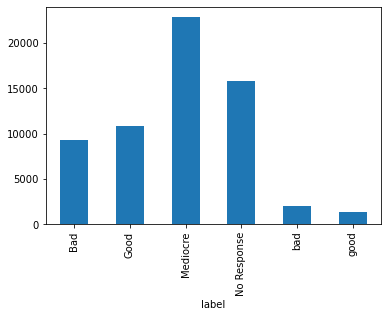

In [32]:
## Check if number of labels in each category is similar or not
print(df_cluster_label.groupby(['label']).size())
ax = df_cluster_label.groupby(['label']).size().plot(kind = 'bar')

In [33]:
# seems the lables are not propery labeled

In [34]:
# create a list of our conditions for proper labels for supervised learning and features selection

conditions = [(df_cluster_label['label'] == 'Mediocre'),
    (df_cluster_label['label'] == 'Bad'), (df_cluster_label['label'] == 'No Response'), (df_cluster_label['label']== 'Good'),
             (df_cluster_label['label']== 'bad'), (df_cluster_label['label']== 'good')]

# create a list of the values we want to assign for each condition
#values = ['2', '0', '3', '1', '0', '1']
values = ['Mediocre', 'Bad', 'No Response', 'Good', 'Bad', 'Good']
# create a new column and use np.select to assign values to it using our lists as arguments
df_cluster_label['updated_label'] = np.select(conditions, values)
df_cluster_label
# display updated DataFrame
df_cluster_label.head()

,cell,drug,min_conc,max_conc,min_norm_intensity,max_norm_intensity,mean_sd,convergence,upper_limit,IC50,slope,lower_limit,cluster,label,updated_label
0,8570,1034,0.007812,2.0,0.074097,0.664380,0.044709,True,0.901533,0.010218,-2.155016,0.152275,12,Mediocre,Mediocre
1,8570,1034,0.007812,2.0,0.087338,0.672330,0.040231,True,1.610422,0.005150,-1.883030,0.167002,12,Mediocre,Mediocre
2,8570,1034,0.007812,2.0,0.068806,0.717342,0.050703,True,14.883637,0.000010,-0.010746,-12.938230,29,Bad,Bad
3,8570,1034,0.007812,2.0,0.071687,0.569093,0.038261,True,0.744103,0.011272,-1.882265,0.129222,12,Mediocre,Mediocre
4,8570,1034,0.007812,2.0,0.058225,0.714683,0.055069,True,0.654130,0.026046,-6.163449,0.129686,19,Mediocre,Mediocre


In [35]:
df_cluster_label.head()

,cell,drug,min_conc,max_conc,min_norm_intensity,max_norm_intensity,mean_sd,convergence,upper_limit,IC50,slope,lower_limit,cluster,label,updated_label
0,8570,1034,0.007812,2.0,0.074097,0.664380,0.044709,True,0.901533,0.010218,-2.155016,0.152275,12,Mediocre,Mediocre
1,8570,1034,0.007812,2.0,0.087338,0.672330,0.040231,True,1.610422,0.005150,-1.883030,0.167002,12,Mediocre,Mediocre
2,8570,1034,0.007812,2.0,0.068806,0.717342,0.050703,True,14.883637,0.000010,-0.010746,-12.938230,29,Bad,Bad
3,8570,1034,0.007812,2.0,0.071687,0.569093,0.038261,True,0.744103,0.011272,-1.882265,0.129222,12,Mediocre,Mediocre
4,8570,1034,0.007812,2.0,0.058225,0.714683,0.055069,True,0.654130,0.026046,-6.163449,0.129686,19,Mediocre,Mediocre


In [36]:
# name dataframe future non_normalized supervised learning
non_narmalized_df = df_cluster_label.copy()
non_narmalized_df.head()

,cell,drug,min_conc,max_conc,min_norm_intensity,max_norm_intensity,mean_sd,convergence,upper_limit,IC50,slope,lower_limit,cluster,label,updated_label
0,8570,1034,0.007812,2.0,0.074097,0.664380,0.044709,True,0.901533,0.010218,-2.155016,0.152275,12,Mediocre,Mediocre
1,8570,1034,0.007812,2.0,0.087338,0.672330,0.040231,True,1.610422,0.005150,-1.883030,0.167002,12,Mediocre,Mediocre
2,8570,1034,0.007812,2.0,0.068806,0.717342,0.050703,True,14.883637,0.000010,-0.010746,-12.938230,29,Bad,Bad
3,8570,1034,0.007812,2.0,0.071687,0.569093,0.038261,True,0.744103,0.011272,-1.882265,0.129222,12,Mediocre,Mediocre
4,8570,1034,0.007812,2.0,0.058225,0.714683,0.055069,True,0.654130,0.026046,-6.163449,0.129686,19,Mediocre,Mediocre


updated_label
Bad            11306
Good           12245
Mediocre       22836
No Response    15772
dtype: int64


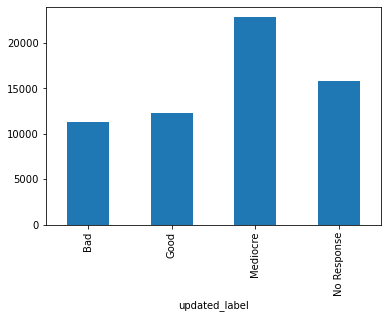

In [37]:
## Check if number of labels in each category is similar after proper labelling

print(df_cluster_label.groupby(['updated_label']).size())
ax = df_cluster_label.groupby(['updated_label']).size().plot(kind = 'bar')

In [38]:
#non-normalized data frame

non_narmalized_df = df_cluster_label.copy()
non_narmalized_df.head()

,cell,drug,min_conc,max_conc,min_norm_intensity,max_norm_intensity,mean_sd,convergence,upper_limit,IC50,slope,lower_limit,cluster,label,updated_label
0,8570,1034,0.007812,2.0,0.074097,0.664380,0.044709,True,0.901533,0.010218,-2.155016,0.152275,12,Mediocre,Mediocre
1,8570,1034,0.007812,2.0,0.087338,0.672330,0.040231,True,1.610422,0.005150,-1.883030,0.167002,12,Mediocre,Mediocre
2,8570,1034,0.007812,2.0,0.068806,0.717342,0.050703,True,14.883637,0.000010,-0.010746,-12.938230,29,Bad,Bad
3,8570,1034,0.007812,2.0,0.071687,0.569093,0.038261,True,0.744103,0.011272,-1.882265,0.129222,12,Mediocre,Mediocre
4,8570,1034,0.007812,2.0,0.058225,0.714683,0.055069,True,0.654130,0.026046,-6.163449,0.129686,19,Mediocre,Mediocre


## Model check with all features and non_normalized data

In [42]:
#check the dataframe

non_narmalized_df.head()

,cell,drug,min_conc,max_conc,min_norm_intensity,max_norm_intensity,mean_sd,convergence,upper_limit,IC50,slope,lower_limit,cluster,label,updated_label
0,8570,1034,0.007812,2.0,0.074097,0.664380,0.044709,True,0.901533,0.010218,-2.155016,0.152275,12,Mediocre,Mediocre
1,8570,1034,0.007812,2.0,0.087338,0.672330,0.040231,True,1.610422,0.005150,-1.883030,0.167002,12,Mediocre,Mediocre
2,8570,1034,0.007812,2.0,0.068806,0.717342,0.050703,True,14.883637,0.000010,-0.010746,-12.938230,29,Bad,Bad
3,8570,1034,0.007812,2.0,0.071687,0.569093,0.038261,True,0.744103,0.011272,-1.882265,0.129222,12,Mediocre,Mediocre
4,8570,1034,0.007812,2.0,0.058225,0.714683,0.055069,True,0.654130,0.026046,-6.163449,0.129686,19,Mediocre,Mediocre


In [43]:
# convert the boolean value to binary value

non_narmalized_df['convergence'] = np.where(non_narmalized_df['convergence']==True, 1, 0)
non_narmalized_df.head()

,cell,drug,min_conc,max_conc,min_norm_intensity,max_norm_intensity,mean_sd,convergence,upper_limit,IC50,slope,lower_limit,cluster,label,updated_label
0,8570,1034,0.007812,2.0,0.074097,0.664380,0.044709,1,0.901533,0.010218,-2.155016,0.152275,12,Mediocre,Mediocre
1,8570,1034,0.007812,2.0,0.087338,0.672330,0.040231,1,1.610422,0.005150,-1.883030,0.167002,12,Mediocre,Mediocre
2,8570,1034,0.007812,2.0,0.068806,0.717342,0.050703,1,14.883637,0.000010,-0.010746,-12.938230,29,Bad,Bad
3,8570,1034,0.007812,2.0,0.071687,0.569093,0.038261,1,0.744103,0.011272,-1.882265,0.129222,12,Mediocre,Mediocre
4,8570,1034,0.007812,2.0,0.058225,0.714683,0.055069,1,0.654130,0.026046,-6.163449,0.129686,19,Mediocre,Mediocre


In [44]:
# convert IC50 to meaning values set as some of them very high variability on the data

non_narmalized_df['IC50'] = non_narmalized_df['IC50'].where(non_narmalized_df['IC50']<30, 30)
non_narmalized_df['IC50'] = non_narmalized_df['IC50'].where(non_narmalized_df['IC50']>0.0000001, 0)
non_narmalized_df.head()

,cell,drug,min_conc,max_conc,min_norm_intensity,max_norm_intensity,mean_sd,convergence,upper_limit,IC50,slope,lower_limit,cluster,label,updated_label
0,8570,1034,0.007812,2.0,0.074097,0.664380,0.044709,1,0.901533,0.010218,-2.155016,0.152275,12,Mediocre,Mediocre
1,8570,1034,0.007812,2.0,0.087338,0.672330,0.040231,1,1.610422,0.005150,-1.883030,0.167002,12,Mediocre,Mediocre
2,8570,1034,0.007812,2.0,0.068806,0.717342,0.050703,1,14.883637,0.000010,-0.010746,-12.938230,29,Bad,Bad
3,8570,1034,0.007812,2.0,0.071687,0.569093,0.038261,1,0.744103,0.011272,-1.882265,0.129222,12,Mediocre,Mediocre
4,8570,1034,0.007812,2.0,0.058225,0.714683,0.055069,1,0.654130,0.026046,-6.163449,0.129686,19,Mediocre,Mediocre


In [48]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_auc_score



test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(non_narmalized_df[non_narmalized_df.columns[:-3]], 
                                                    non_narmalized_df['updated_label'],
                                                    stratify=non_narmalized_df['updated_label'], test_size = test_size)
# Now let's see what we're working with
print(f"Test set is {len(X_test)} items and train set is {len(X_train)} items large.")

Test set is 18648 items and train set is 43511 items large.


In [49]:
# basic descision tree classifier
from sklearn.tree import DecisionTreeClassifier


dt_clf = DecisionTreeClassifier(random_state=1000).fit(X_train, y_train)
#  fit the training data

dt_clf.score(X_train,y_train)

1.0

0.8632197608948488

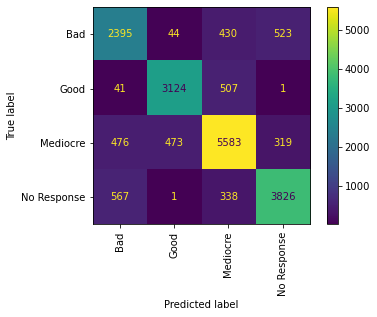

In [51]:
# interested in our test set, so let's bring in the confusion matrix functions and ROC/AUC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score

# Now let's predict on the hold out test set
predictions = dt_clf.predict(X_test)
# And let's render that for analysis as a confusion matrix
cm = confusion_matrix(y_test, predictions, labels=dt_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_clf.classes_)
disp.plot()
plt.xticks(rotation = 90)
# And we'll generate our AUC curve data
roc_auc_score(y_test, dt_clf.predict_proba(X_test), multi_class='ovr')

In [52]:
from sklearn.metrics import f1_score, balanced_accuracy_score, accuracy_score, make_scorer
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# make predictions for DecisionTree

y_pred = dt_clf.predict(X_test)


In [53]:
#accuracy score without balanced
accuracy_score(y_test, y_pred)

0.8005148005148005

In [54]:
# balanced accuracy score for DecisionTree

balanced_accuracy_score(y_test, y_pred)

0.7950147902239314

In [55]:
#precision_score weighted
precision_score(y_test, y_pred, average='weighted')

0.8011918308105763

In [56]:
#recall_score weighted
recall_score(y_test, y_pred, average='weighted')

0.8005148005148005

In [57]:
# f1 score for DecisionTree
f1_score(y_test, y_pred, average='weighted')

0.8008206067894693

In [58]:
# Now, let's create our training and validation sets. 
test_size = 0.3

X_train, X_val, y_train, y_val = train_test_split(non_narmalized_df[non_narmalized_df.columns[:-3]],
                                                  non_narmalized_df['updated_label'],
                                                  test_size = test_size,
                                                  random_state=1000, 
                                                  stratify=non_narmalized_df['updated_label'])
#fill missing values with the mean.
# (a) choosing the mean is an arbitrary choice on my part! It might not make sense always!
# (b) you *must* do this *after* you split your training/validation sets, these two
# datasets must be treated as independent
X_train=X_train.fillna(X_train.mean())
X_val=X_val.fillna(X_val.mean())

In [59]:
#check the value counts of labels
y_val.value_counts()

Mediocre       6851
No Response    4732
Good           3673
Bad            3392
Name: updated_label, dtype: int64

In [60]:
# import our ensemble classifier
from sklearn.ensemble import VotingClassifier

#dictionary of classifiers to use
clfs={}

# create a couple of different of descision trees
from sklearn.tree import DecisionTreeClassifier

# - one which has only a depth of 3
clfs["dt0"]=DecisionTreeClassifier(max_depth=3, random_state=1000)
# - one which requires there to be at least 7 samples at each leaf
clfs["dt1"]=DecisionTreeClassifier(min_samples_leaf=7, random_state=1000)
# - and one which balances the classes since we have unbalanced data
clfs["dt2"]=DecisionTreeClassifier(class_weight="balanced", random_state=1000)

In [61]:

# voting ensembles, can do work in parallel. Here I'm setting the n_jobs
# parameter to -1, which tells the classifier to use all system CPUs
voters=VotingClassifier(estimators=clfs.items(), n_jobs=-1)

# fit the data
voters.fit(X_train,y_train)

VotingClassifier(estimators=dict_items([('dt0', DecisionTreeClassifier(max_depth=3, random_state=1000)), ('dt1', DecisionTreeClassifier(min_samples_leaf=7, random_state=1000)), ('dt2', DecisionTreeClassifier(class_weight='balanced', random_state=1000))]),
                 n_jobs=-1)

In [62]:
# voters variable is this collection of three different 
# models which have been trained on this dataset
# look at the accuracy or other evaluation measures
voters.score(X_train, y_train)

0.944404863138057

In [63]:
# performance in our validation dataset

voters.score(X_val, y_val)

0.8258794508794509

In [64]:
# make predictions for VotingClassifier with DT

y_pred = voters.predict(X_val)


In [65]:
#accuracy score without balanced
accuracy_score(y_val, y_pred)

0.8258794508794509

In [66]:
# balanced accuracy score for VotingClassifier with DT

balanced_accuracy_score(y_val, y_pred)

0.814647522079212

In [67]:
#precision_score weighted
precision_score(y_val, y_pred, average='weighted')


0.8272796867551876

In [68]:
# f1 score for VotingTree with DT

f1_score(y_val, y_pred, average='weighted')

0.8259163597490902

In [69]:
#recall_score weighted
recall_score(y_val, y_pred, average='weighted')

0.8258794508794509

In [70]:
from sklearn.ensemble import BaggingClassifier

# descision trees. We can set how many classifiers we want the bagger
# using the n_estimators parameter. 

bagger=BaggingClassifier(base_estimator=clfs["dt0"],
                        n_estimators=10,
                        max_features=0.7,
                        n_jobs=-1,
                        random_state=1000)
bagger.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                        random_state=1000),
                  max_features=0.7, n_jobs=-1, random_state=1000)

In [71]:
# With the bagger and the voter we can actually explore the individual models 

bagger.estimators_

[DecisionTreeClassifier(max_depth=3, random_state=1970544363),
 DecisionTreeClassifier(max_depth=3, random_state=1077348022),
 DecisionTreeClassifier(max_depth=3, random_state=473922508),
 DecisionTreeClassifier(max_depth=3, random_state=2113565594),
 DecisionTreeClassifier(max_depth=3, random_state=1173624936),
 DecisionTreeClassifier(max_depth=3, random_state=1474976016),
 DecisionTreeClassifier(max_depth=3, random_state=1528487102),
 DecisionTreeClassifier(max_depth=3, random_state=1071226617),
 DecisionTreeClassifier(max_depth=3, random_state=499256588),
 DecisionTreeClassifier(max_depth=3, random_state=906594506)]

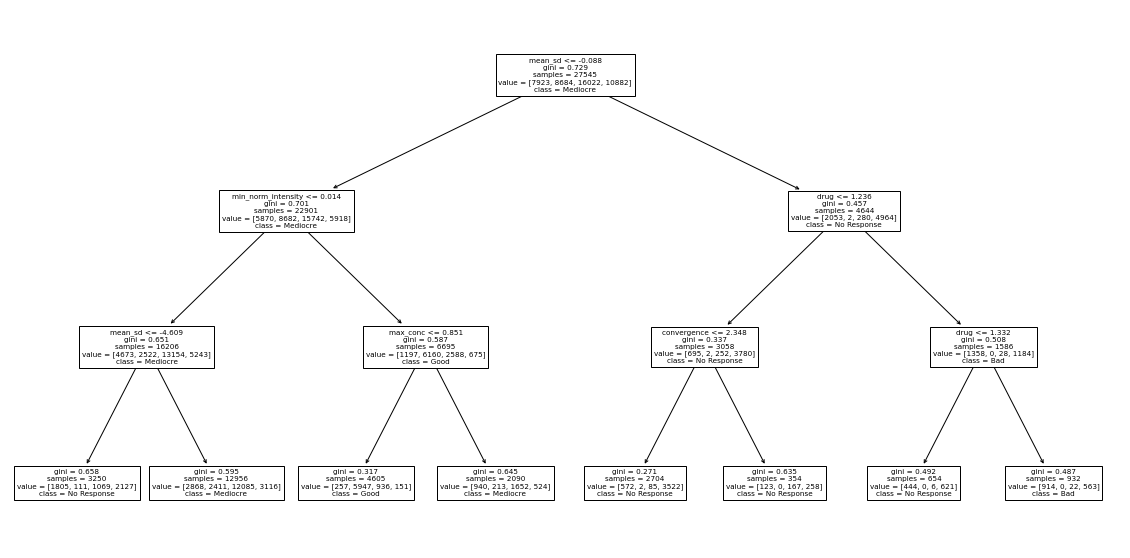

In [79]:

# all just regular descision trees underneath
# plotting them

# tree plotting functionality
from sklearn.tree import plot_tree
# Create a new figure
fig= plt.figure(figsize=(20,10))
# And now take a look at that first tree
plot_tree(bagger.estimators_[0], 
          feature_names=X_train.columns, 
          class_names=np.unique(y_train.astype(str)));

#  save the output to a file

plt.savefig('tree.svg',bbox_inches = "tight")

In [80]:
# bagger both on training data
bagger.score(X_train, y_train)

0.7307807221162465

In [81]:
# validation data
bagger.score(X_val, y_val)

0.7313921063921064

In [82]:
from sklearn.ensemble import GradientBoostingClassifier

# select various tree parameters. 
# multiple boosters and ensemble them together
booster=GradientBoostingClassifier(min_samples_leaf=7, 
                                   max_depth=5, 
                                   n_estimators=100, 
                                   random_state=1000)

booster.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=5, min_samples_leaf=7, random_state=1000)

In [83]:
# see how many models it
# ended up generating
booster.n_estimators

100

In [84]:
# the score on the training set
booster.score(X_train, y_train)

0.9012893291351612

In [85]:
# validation data
bagger.score(X_val, y_val)

0.7313921063921064

In [86]:

from sklearn.ensemble import StackingClassifier

# LogisticRegression
from sklearn.linear_model import LogisticRegression
stacker=StackingClassifier(estimators=clfs.items(), 
                           final_estimator=LogisticRegression(max_iter=1000,random_state=1000), 
                           cv=5, 
                           n_jobs=-1)
stacker.fit(X_train,y_train)

StackingClassifier(cv=5,
                   estimators=dict_items([('dt0', DecisionTreeClassifier(max_depth=3, random_state=1000)), ('dt1', DecisionTreeClassifier(min_samples_leaf=7, random_state=1000)), ('dt2', DecisionTreeClassifier(class_weight='balanced', random_state=1000))]),
                   final_estimator=LogisticRegression(max_iter=1000,
                                                      random_state=1000),
                   n_jobs=-1)

In [87]:
# scores to consider
stacker.score(X_train, y_train)

0.9507251039966905

In [139]:
# validation scores to consider
stacker.score(X_val, y_val)

0.8379450879450879

In [140]:
# make predictions for StackingClassifier

y_pred = stacker.predict(X_val)


In [141]:
#accuracy score without balanced
accuracy_score(y_val, y_pred)

0.8379450879450879

In [142]:
# balanced accuracy score for StackingClassifier 
balanced_accuracy_score(y_val, y_pred)


0.8259125142933429

In [143]:
# f1 score for Stacking

f1_score(y_val, y_pred, average='weighted')

0.8371692963879777

In [144]:
#recall_score weighted
recall_score(y_val, y_pred, average='weighted')


0.8379450879450879

In [145]:
#precision_score weighted
precision_score(y_val, y_pred, average='weighted')

0.8377231080560007

0.9566593826592193

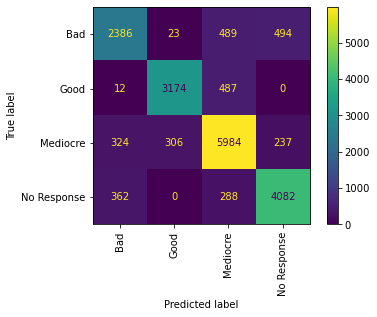

In [93]:
# predict on the hold out test set
predictions = stacker.predict(X_val)
#analysis as a confusion matrix
cm = confusion_matrix(y_val, predictions, labels=stacker.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=stacker.classes_)
disp.plot()
plt.xticks(rotation = 90)
#generate our AUC curve data
roc_auc_score(y_val, stacker.predict_proba(X_val), multi_class='ovr')

In [94]:
y_val.value_counts()

Mediocre       6851
No Response    4732
Good           3673
Bad            3392
Name: updated_label, dtype: int64

## Hyperparameter tuning on ensemble methods

## Source: https://www.kaggle.com/code/sigmaset/hyperparameter-tuning-ensemble-methods

In [95]:

import matplotlib.pyplot as plt; plt.rcdefaults()

# Feature Engineering
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split

# Classification Models
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

# Hyperparameter Tuning
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, StratifiedKFold

# Performance Measures
#from sklearn.metrics import accuracy_score

# Global Variables
rnd_state = 42
skfold = StratifiedKFold(n_splits=5)

In [96]:
%%time
#logistic regression
log_clf = LogisticRegression(random_state=rnd_state, solver='lbfgs')
log_clf.fit(X_train, y_train)

CPU times: user 1.56 s, sys: 55 µs, total: 1.56 s
Wall time: 1.56 s


LogisticRegression(random_state=42)

In [97]:
log_pred = log_clf.predict(X_val)

In [98]:
%%time
#get cross_val_score
log_cross_scores = cross_val_score(log_clf, X_train, y_train, cv=skfold, scoring="accuracy")
log_scores = (log_cross_scores.mean() + accuracy_score(log_pred, y_val))/2
log_scores

CPU times: user 6.93 s, sys: 8.05 ms, total: 6.94 s
Wall time: 6.94 s


0.3689943517945473

In [99]:
%%time
## five fold cross validation
#Logistic Regression
lr = LogisticRegression(penalty='l2', max_iter=100, C=1, random_state=42)
lr.fit(X_train, y_train)
lr_bow_cv_scores = cross_val_score(lr, X_train, y_train, cv=5)
lr_bow_cv_mean_score = np.mean(lr_bow_cv_scores)
print('CV Accuracy (5-fold):', lr_bow_cv_scores)
print('Mean CV Accuracy:', lr_bow_cv_mean_score)
lr_bow_test_score = lr.score(X_val, y_val)
print('Test Accuracy:', lr_bow_test_score)



CV Accuracy (5-fold): [0.371 0.37  0.37  0.368 0.36 ]
Mean CV Accuracy: 0.36797583357622454
Test Accuracy: 0.37001287001287003
CPU times: user 8.55 s, sys: 8 ms, total: 8.56 s
Wall time: 8.56 s


In [100]:
%%time
#SGD
sgd_clf = SGDClassifier(max_iter=60, penalty = None, eta0=0.1, random_state=rnd_state, tol =1e-3)
sgd_clf.fit(X_train, y_train)

CPU times: user 628 ms, sys: 11.2 ms, total: 640 ms
Wall time: 639 ms


SGDClassifier(eta0=0.1, max_iter=60, penalty=None, random_state=42)

In [101]:
%%time
#get cross_val_score
sgd_cross_scores = cross_val_score(sgd_clf, X_train, y_train, cv=skfold, scoring="accuracy")
sgd_pred = sgd_clf.predict(X_val)
sgd_scores = (sgd_cross_scores.mean() + accuracy_score (sgd_pred, y_val))/2
sgd_scores

CPU times: user 2.9 s, sys: 14 µs, total: 2.9 s
Wall time: 2.9 s


0.32571787530356827

In [102]:
%%time
#svm
svm_clf = SVC (gamma='auto')
svm_clf.fit (X_train, y_train)

CPU times: user 5min 57s, sys: 571 ms, total: 5min 58s
Wall time: 5min 58s


SVC(gamma='auto')

In [103]:
%%time
#get cross_val_score
svm_cross_scores = cross_val_score(svm_clf, X_train, y_train, cv=skfold, scoring="accuracy")
svm_pred = svm_clf.predict(X_val)
svm_scores = (svm_cross_scores.mean() + accuracy_score (svm_pred, y_val))/2
svm_scores

CPU times: user 21min 9s, sys: 1.47 s, total: 21min 11s
Wall time: 21min 11s


0.6057822426151973

In [104]:
%%time
#KNN
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train) 
#get cross_val_score_
knn_cross_scores = cross_val_score(knn_clf, X_train, y_train, cv=skfold, scoring="accuracy")
knn_pred = knn_clf.predict(X_val)
knn_scores = (knn_cross_scores.mean() + accuracy_score (knn_pred,  y_val))/2
knn_scores

CPU times: user 5.05 s, sys: 12 ms, total: 5.06 s
Wall time: 5.06 s


0.6035262020015819

In [105]:
%%time
#hyperparameter tuning on KNN

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]

grid_knn_clf = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3, n_jobs=-1)
grid_knn_clf.fit(X_train, y_train)
grid_knn_clf.best_params_

Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: user 608 ms, sys: 100 ms, total: 708 ms
Wall time: 5.88 s


{'n_neighbors': 5, 'weights': 'distance'}

In [106]:
%%time
#get cross validation score after hyperparameter tuning

grid_knn_cross_scores = cross_val_score(grid_knn_clf, X_train, y_train, cv=skfold, scoring="accuracy")
grid_knn_pred = grid_knn_clf.predict(X_val)
grid_knn_scores = (grid_knn_cross_scores.mean() + accuracy_score (grid_knn_pred, y_val))/2
grid_knn_scores

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: user 5.58 s, sys: 184 ms, total: 5.77 s
Wall time: 24.7 s


0.6319555159263703

In [107]:
%%time
#extra tree
ext_clf = ExtraTreesClassifier()

param_grid = {"max_depth": [None],
              "max_features": [10, 17],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False, True],
              "n_estimators" :[50,100,200],
              "criterion": ["gini"]}

# Cross validate model with Kfold stratified cross val

grid_ext_clf = GridSearchCV(ext_clf,param_grid, cv=skfold, scoring="accuracy", n_jobs= 4, verbose = 1)
grid_ext_clf.fit(X_train, y_train)

grid_ext_clf.best_params_

Fitting 5 folds for each of 108 candidates, totalling 540 fits
CPU times: user 19.5 s, sys: 844 ms, total: 20.3 s
Wall time: 5min 17s


{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [108]:
#get score after hyperparameter tuning
grid_ext_pred = grid_ext_clf.predict(X_val)

grid_ext_scores = (grid_ext_clf.best_score_ + accuracy_score (grid_ext_pred, y_val))/2
grid_ext_scores

0.8569496769904467

CPU times: user 2.01 s, sys: 36 ms, total: 2.05 s
Wall time: 2.05 s


0.9741602534604126

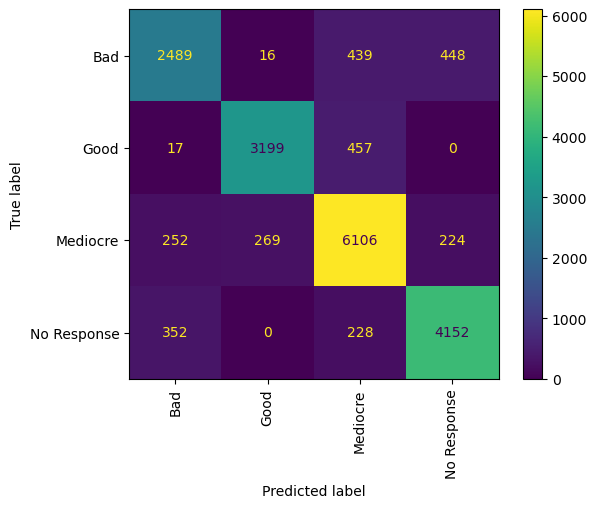

In [109]:
%%time
# Now let's predict on the hold out test set
predictions = grid_ext_clf.predict(X_val)
# analysis as a confusion matrix
cm = confusion_matrix(y_val, predictions, labels=grid_ext_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_ext_clf.classes_)
disp.plot()
plt.xticks(rotation = 90)
# generate our AUC curve data
roc_auc_score(y_val, grid_ext_clf.predict_proba(X_val), multi_class='ovr')

In [157]:
#make prediction
y_pred = grid_ext_clf.predict(X_val)

In [158]:
#accuracy score without balanced
accuracy_score(y_val, y_pred)

0.8551051051051051

In [159]:
# balanced accuracy score for ExtraTree 
balanced_accuracy_score(y_val, y_pred)


0.843355641802622

In [160]:
# f1 score for ExtraTree

f1_score(y_val, y_pred, average='weighted')

0.8544674430486344

In [161]:
#precision_score weighted
precision_score(y_val, y_pred, average='weighted')

0.8551033101046883

In [163]:
#recall_score weighted
recall_score(y_val, y_pred, average='weighted')

0.8551051051051051

In [112]:
%%time

#AdaBoost
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(random_state=rnd_state, max_depth=2),
    random_state = rnd_state)

param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[10, 100, 200, 250],
              "learning_rate":  [0.05, 0.5, 1.5, 2.5]}

grid_ada_clf = GridSearchCV(ada_clf, param_grid, cv=skfold, scoring="accuracy", n_jobs= -1, verbose = 1)
grid_ada_clf.fit(X_train, y_train)
grid_ada_clf.best_params_

ada_pred = grid_ada_clf.predict(X_val)
grid_ada_scores = (grid_ada_clf.best_score_ + accuracy_score (ada_pred, y_val))/2
grid_ada_scores

Fitting 5 folds for each of 128 candidates, totalling 640 fits
CPU times: user 49.5 s, sys: 1.05 s, total: 50.6 s
Wall time: 37min 40s


0.8020752535008164

In [151]:
#make prediction
y_pred = grid_ada_clf.predict(X_val)

In [152]:
#accuracy score without balanced
accuracy_score(y_val, y_pred)

0.8045366795366795

In [153]:
# balanced accuracy score for AdaBoost
balanced_accuracy_score(y_val, y_pred)

0.7890110569255742

In [154]:
# f1 score for AdaBoost

f1_score(y_val, y_pred, average='weighted')

0.803025995109529

In [155]:
#precision_score weighted
precision_score(y_val, y_pred, average='weighted')

0.8049030482538007

In [156]:
#recall_score weighted
recall_score(y_val, y_pred, average='weighted')

0.8045366795366795

In [113]:
# create function for metrics generation

def get_metrics(true_labels, predicted_labels):
    
    print('Accuracy:', np.round(
                        metrics.accuracy_score(true_labels, 
                                               predicted_labels),
                        4))
    print('Precision:', np.round(
                        metrics.precision_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('Recall:', np.round(
                        metrics.recall_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('F1 Score:', np.round(
                        metrics.f1_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))

In [114]:
# display funtion for metrics

def display_classification_report(true_labels, predicted_labels, classes=['Bad', 'Good', 'Mediocre', 'No Response']):

    report = metrics.classification_report(y_true=true_labels, 
                                           y_pred=predicted_labels, 
                                           labels=classes) 
    print(report)

In [115]:

from sklearn import metrics

from sklearn.preprocessing import LabelEncoder
from sklearn.base import clone
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.metrics import roc_curve, auc 

#ada_booster_classifier metrics

ada_clf_predictions = grid_ada_clf.predict(X_val)
unique_classes = list(set(y_val))
get_metrics(true_labels=y_val, predicted_labels=ada_clf_predictions)

Accuracy: 0.8045
Precision: 0.8049
Recall: 0.8045
F1 Score: 0.803


In [116]:
#display metrics on ada_booster

display_classification_report(true_labels=y_val, 
                                  predicted_labels=ada_clf_predictions, classes=unique_classes)

              precision    recall  f1-score   support

        Good       0.86      0.78      0.82      3673
    Mediocre       0.79      0.84      0.81      6851
 No Response       0.81      0.88      0.84      4732
         Bad       0.76      0.66      0.71      3392

    accuracy                           0.80     18648
   macro avg       0.81      0.79      0.80     18648
weighted avg       0.80      0.80      0.80     18648



In [117]:
# let's predict on on some training test data set 
train_idx, test_idx = train_test_split(np.array(range(len(non_narmalized_df['updated_label']))), test_size=0.30, random_state=42)
test_idx

array([25309, 43648, 48256, ..., 56416,  3893, 52039])

In [118]:
# with ada_booster mode
# generate data frame with prediction on predicted label with predicted confidence on original updated_label
predict_probas = grid_ada_clf.predict(X_val)
test_df = non_narmalized_df.iloc[test_idx]
test_df['Predicted Label'] = ada_clf_predictions
test_df['Predicted Confidence'] = predict_probas
test_df



,cell,drug,min_conc,max_conc,min_norm_intensity,max_norm_intensity,mean_sd,convergence,upper_limit,IC50,slope,lower_limit,cluster,label,updated_label,Predicted Label,Predicted Confidence
26014,5230,1372,0.001001,1.0,0.330783,0.762018,0.035250,1,3.492985,0.000009,-0.459039,0.350573,37,Mediocre,Mediocre,Bad,Bad
44531,3490,1377,0.039062,10.0,0.288951,0.405630,0.045485,1,0.625523,0.042126,-0.040830,0.112207,8,Mediocre,Mediocre,Good,Good
49209,3206,1017,0.019531,5.0,0.308476,1.465098,0.388898,1,0.939422,30.000000,-0.731777,-2.148837,21,Bad,Bad,Mediocre,Mediocre
1576,8570,1089,0.010005,10.0,1.024450,1.750020,0.161699,1,3.603242,14.490283,7.624053,1.307558,27,Bad,Bad,Bad,Bad
32298,6666,1034,0.007812,2.0,0.071610,1.002615,0.029620,0,1.527400,2.744948,-0.241464,-1.400324,33,Mediocre,Mediocre,Mediocre,Mediocre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55059,6413,1862,0.015625,4.0,0.079817,0.890487,0.044312,1,0.845330,0.158074,-2.299957,0.136328,25,Good,Good,Bad,Bad
32351,3421,1034,0.007812,2.0,0.099036,1.086286,0.050883,1,1.014895,0.453467,-1.137352,-0.038596,14,Mediocre,Mediocre,Bad,Bad
57440,6290,1034,0.007812,2.0,0.041965,0.801690,0.038221,1,0.761223,0.136889,-1.769766,0.045396,25,Good,Good,Mediocre,Mediocre
3952,8692,1372,0.001001,1.0,0.465010,0.957800,0.109323,1,4.490857,0.000011,-0.546792,0.599208,28,No Response,No Response,Mediocre,Mediocre


In [119]:
#get predicted confidene labels counts
test_df['Predicted Confidence'].value_counts()


Mediocre       7275
No Response    5122
Good           3300
Bad            2951
Name: Predicted Confidence, dtype: int64

In [120]:
# get original labels counts
test_df['updated_label'].value_counts()


Mediocre       6920
No Response    4745
Good           3639
Bad            3344
Name: updated_label, dtype: int64

## END